In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import uniform, truncnorm, randint

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [2]:
url = 'https://drive.google.com/file/d/1CoTEepAbFPR1c1V4xkaYKZB4l85teqQk/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df_raw = pd.read_csv(path, low_memory=False, index_col=0, header=None).T
print(df_raw.shape)

(32316, 235)


In [3]:
df = df_raw.copy(deep=True)

In [4]:
df.columns.values.tolist()

[nan,
 'MSRP',
 'Gas Mileage',
 'Engine',
 'EPA Class',
 'Style Name',
 'Drivetrain',
 'Passenger Capacity',
 'Passenger Doors',
 'Body Style',
 'Transmission',
 'EPA Classification',
 'Base Curb Weight (lbs)',
 'Front Hip Room (in)',
 'Front Leg Room (in)',
 'Second Shoulder Room (in)',
 'Passenger Volume (ft³)',
 'Second Head Room (in)',
 'Front Shoulder Room (in)',
 'Second Hip Room (in)',
 'Front Head Room (in)',
 'Second Leg Room (in)',
 'Wheelbase (in)',
 'Min Ground Clearance (in)',
 'Track Width, Front (in)',
 'Width, Max w/o mirrors (in)',
 'Track Width, Rear (in)',
 'Height, Overall (in)',
 'Cargo Volume to Seat 1 (ft³)',
 'Cargo Volume to Seat 2 (ft³)',
 'Cargo Volume to Seat 3 (ft³)',
 'Fuel Tank Capacity, Approx (gal)',
 'Fuel Economy Est-Combined (MPG)',
 'EPA Fuel Economy Est - City (MPG)',
 'EPA Fuel Economy Est - Hwy (MPG)',
 'Engine Order Code',
 'SAE Net Torque @ RPM',
 'Fuel System',
 'Engine Type',
 'SAE Net Horsepower @ RPM',
 'Displacement',
 'First Gear Ratio (:

In [5]:
print(df.shape)
df["MSRP"] = df['MSRP'].replace('[\$,]', '', regex=True).astype(float)
print(df["MSRP"].isnull().sum())
df.dropna(subset=["MSRP"], inplace=True)
df = df.reset_index()
#display(df)
df["MSRP"] = df["MSRP"].astype(int)
print(df["MSRP"].isnull().sum())
df = df.drop("index", axis=1)
print(df.shape)

(32316, 235)
54
0
(32262, 235)


In [6]:
df = df.rename(columns={np.nan: 'model'})
df.columns
df

,model,MSRP,Gas Mileage,Engine,EPA Class,Style Name,Drivetrain,Passenger Capacity,Passenger Doors,Body Style,...,Fourth Hip Room (in),Fourth Leg Room (in),Fourth Shoulder Room (in),Fourth Head Room (in),Fifth Shoulder Room (in),Fifth Head Room (in),Fifth Hip Room (in),Fifth Leg Room (in),Corrosion Note,Hybrid/Electric Components Note
0,2019 Acura RDX Specs: FWD w/Technology Pkg,40600,22 mpg City/28 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/Technology Pkg,Front Wheel Drive,5,4,Sport Utility,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019 Acura RDX Specs: FWD w/Advance Pkg,45500,22 mpg City/28 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/Advance Pkg,Front Wheel Drive,5,4,Sport Utility,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019 Acura RDX Specs: FWD w/A-Spec Pkg,43600,22 mpg City/27 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/A-Spec Pkg,Front Wheel Drive,5,4,Sport Utility,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019 Acura RDX Specs: FWD,37400,22 mpg City/28 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD,Front Wheel Drive,5,4,Sport Utility,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019 Acura RDX Specs: AWD w/Technology Pkg,42600,21 mpg City/27 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 4WD,AWD w/Technology Pkg,All Wheel Drive,5,4,Sport Utility,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32257,2018 Volvo V60 Cross Country Specs: T5 AWD Pla...,45700,NaN,"Intercooled Turbo Regular Unleaded I-4, 2.0 L",Mid-Size Station Wagon,T5 AWD Platinum,All Wheel Drive,5,4,4dr Car,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32258,2016 Volvo V60 Cross Country Specs: 4-Door Wag...,41200,20 mpg City/28 mpg Hwy,"Intercooled Turbo Regular Unleaded I-5, 2.5 L",Mid-Size Station Wagon,4dr Wgn T5 AWD,All Wheel Drive,5,4,4dr Car,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32259,2016 Volvo V60 Cross Country Specs: 4-Door Wag...,44850,20 mpg City/28 mpg Hwy,"Intercooled Turbo Regular Unleaded I-5, 2.5 L",Mid-Size Station Wagon,4dr Wgn T5 Platinum AWD,All Wheel Drive,5,4,4dr Car,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32260,2015 Volvo V60 Cross Country Specs: 2015.5 4-D...,41000,20 mpg City/28 mpg Hwy,"Intercooled Turbo Regular Unleaded I-5, 2.5 L",Mid-Size Station Wagon,2015.5 4dr Wgn T5 AWD,All Wheel Drive,5,4,4dr Car,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Should be done with "apply" method
## todo

In [7]:
i = 0
df["Year"] = 0
df["Marque"] = ""
df["Modele"] = ""
df["Specs"] = ""
size = df.shape[0]
while i < size:
    strings = df.loc[i, "model"].split(" ")
    df.loc[i, "Year"] = int(strings[0])
    df.loc[i, "Marque"] = strings[1]
    df.loc[i, "Modele"] = strings[2]
    z = 3
    str_size = len(strings)
    while z < str_size and strings[z].find("Specs") == -1:
        df.loc[i, "Modele"] = df.loc[i, "Modele"] + strings[z]
        z += 1
    if z < str_size:
        z += 1
        while z < str_size:
            df.loc[i, "Specs"] = df.loc[i, "Specs"] + strings[z]
            z += 1
    if i == 1:
        print("in process")
    i += 1
print("done")
df = df.drop("model", axis = 1)
print(df.shape)
df[["Year", "Marque", "Modele", "Specs"]].head()

in process
done
(32262, 238)


,Year,Marque,Modele,Specs
0,2019,Acura,RDX,FWDw/TechnologyPkg
1,2019,Acura,RDX,FWDw/AdvancePkg
2,2019,Acura,RDX,FWDw/A-SpecPkg
3,2019,Acura,RDX,FWD
4,2019,Acura,RDX,AWDw/TechnologyPkg


In [8]:
df

,MSRP,Gas Mileage,Engine,EPA Class,Style Name,Drivetrain,Passenger Capacity,Passenger Doors,Body Style,Transmission,...,Fifth Shoulder Room (in),Fifth Head Room (in),Fifth Hip Room (in),Fifth Leg Room (in),Corrosion Note,Hybrid/Electric Components Note,Year,Marque,Modele,Specs
0,40600,22 mpg City/28 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/Technology Pkg,Front Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc: sequent...,...,NaN,NaN,NaN,NaN,NaN,NaN,2019,Acura,RDX,FWDw/TechnologyPkg
1,45500,22 mpg City/28 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/Advance Pkg,Front Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc: sequent...,...,NaN,NaN,NaN,NaN,NaN,NaN,2019,Acura,RDX,FWDw/AdvancePkg
2,43600,22 mpg City/27 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/A-Spec Pkg,Front Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc: sequent...,...,NaN,NaN,NaN,NaN,NaN,NaN,2019,Acura,RDX,FWDw/A-SpecPkg
3,37400,22 mpg City/28 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD,Front Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc: sequent...,...,NaN,NaN,NaN,NaN,NaN,NaN,2019,Acura,RDX,FWD
4,42600,21 mpg City/27 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 4WD,AWD w/Technology Pkg,All Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc: sequent...,...,NaN,NaN,NaN,NaN,NaN,NaN,2019,Acura,RDX,AWDw/TechnologyPkg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32257,45700,NaN,"Intercooled Turbo Regular Unleaded I-4, 2.0 L",Mid-Size Station Wagon,T5 AWD Platinum,All Wheel Drive,5,4,4dr Car,Transmission: 8-Speed Geartronic Automatic -in...,...,NaN,NaN,NaN,NaN,NaN,NaN,2018,Volvo,V60CrossCountry,T5AWDPlatinum
32258,41200,20 mpg City/28 mpg Hwy,"Intercooled Turbo Regular Unleaded I-5, 2.5 L",Mid-Size Station Wagon,4dr Wgn T5 AWD,All Wheel Drive,5,4,4dr Car,Transmission: 6-Speed Geartronic Automatic -in...,...,NaN,NaN,NaN,NaN,NaN,NaN,2016,Volvo,V60CrossCountry,4-DoorWagonT5AWD
32259,44850,20 mpg City/28 mpg Hwy,"Intercooled Turbo Regular Unleaded I-5, 2.5 L",Mid-Size Station Wagon,4dr Wgn T5 Platinum AWD,All Wheel Drive,5,4,4dr Car,Transmission: 6-Speed Geartronic Automatic -in...,...,NaN,NaN,NaN,NaN,NaN,NaN,2016,Volvo,V60CrossCountry,4-DoorWagonT5PlatinumAWD
32260,41000,20 mpg City/28 mpg Hwy,"Intercooled Turbo Regular Unleaded I-5, 2.5 L",Mid-Size Station Wagon,2015.5 4dr Wgn T5 AWD,All Wheel Drive,5,4,4dr Car,Transmission: 6-Speed Geartronic Automatic -in...,...,NaN,NaN,NaN,NaN,NaN,NaN,2015,Volvo,V60CrossCountry,2015.54-DoorWagonT5AWD


IN DF2 WE DROP COLUMN WITH TOO MUCH NULL VALUES

In [9]:
#null_values = df.iloc[:, 0:50].isnull().sum() / 32316 * 100

def plot_null_values(df, figsize=(10, 10), fontsize=20, x_pas=10, grid=False):
    null_values = np.array(df.isnull().sum() / df.shape[0] * 100)
    plt.figure(figsize=figsize)
    plt.plot(null_values, color="red")
    plt.xticks(np.array(range(0, df.shape[1], x_pas)))
    plt.xlabel("column index", fontsize=fontsize)
    plt.ylabel("null %", fontsize=fontsize)
    plt.title('Null Values', fontsize=fontsize)
    if grid:
        plt.grid()
    plt.show()

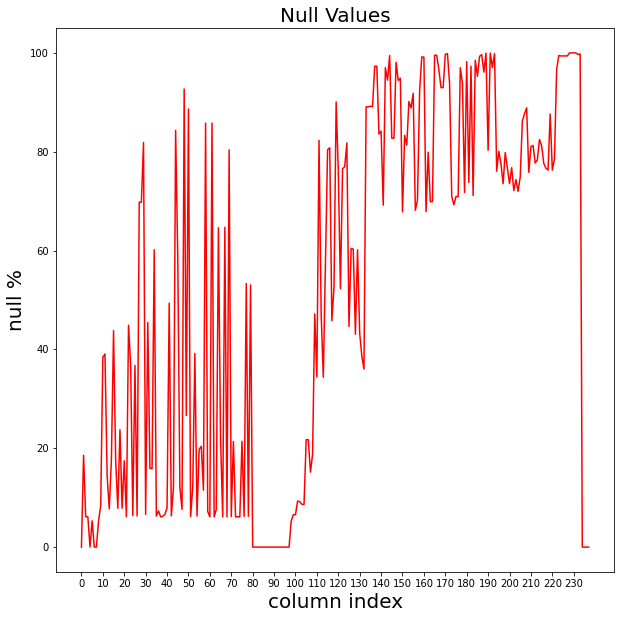

In [10]:
plot_null_values(df)

In [11]:
#len([x for x in null_values if x < 22])

def drop_null_values_percent(df, percent, inplace=False):
    null_values = np.array(df.isnull().sum() / df.shape[0] * 100)
    indexs = []
    i = 0
    size = len(null_values)
    while i < size:
        if null_values[i] <= percent:
            indexs.append(i)
        i += 1
    if inplace:
        df = df.iloc[:, indexs]
    df_cp = df.copy(deep=True)
    return(df_cp.iloc[:, indexs])

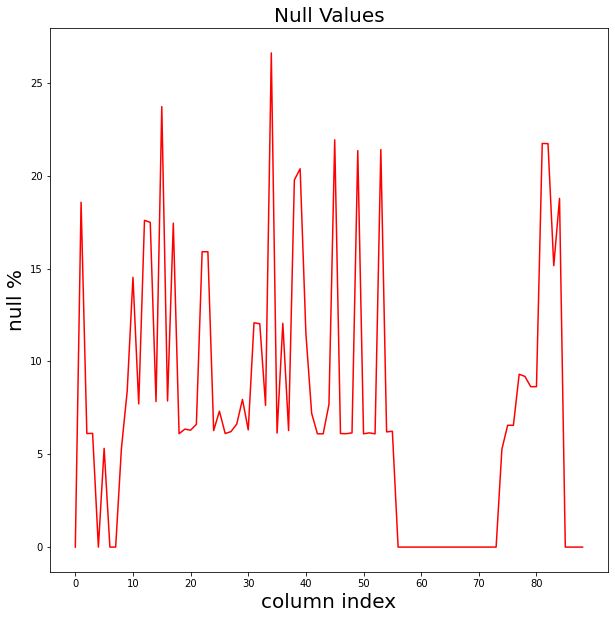

['MSRP',
 'Gas Mileage',
 'Engine',
 'EPA Class',
 'Style Name',
 'Drivetrain',
 'Passenger Capacity',
 'Passenger Doors',
 'Body Style',
 'Transmission',
 'Front Hip Room (in)',
 'Front Leg Room (in)',
 'Second Shoulder Room (in)',
 'Second Head Room (in)',
 'Front Shoulder Room (in)',
 'Second Hip Room (in)',
 'Front Head Room (in)',
 'Second Leg Room (in)',
 'Wheelbase (in)',
 'Width, Max w/o mirrors (in)',
 'Height, Overall (in)',
 'Fuel Tank Capacity, Approx (gal)',
 'EPA Fuel Economy Est - City (MPG)',
 'EPA Fuel Economy Est - Hwy (MPG)',
 'SAE Net Torque @ RPM',
 'Fuel System',
 'Engine Type',
 'SAE Net Horsepower @ RPM',
 'Displacement',
 'First Gear Ratio (:1)',
 'Trans Description Cont.',
 'Fourth Gear Ratio (:1)',
 'Second Gear Ratio (:1)',
 'Reverse Ratio (:1)',
 'Fifth Gear Ratio (:1)',
 'Trans Type',
 'Third Gear Ratio (:1)',
 'Brake Type',
 'Rear Brake Rotor Diam x Thickness (in)',
 'Disc - Rear (Yes or   )',
 'Brake ABS System',
 'Front Brake Rotor Diam x Thickness (in)

In [12]:
df2 = drop_null_values_percent(df, 30)
plot_null_values(df2)
df2.columns.values.tolist()

# Select From Model

In [13]:
from sklearn.feature_selection import SelectFromModel

In [14]:
df2 = df.copy(deep=True)
tab = df2.loc[:, df2.dtypes == object].columns.values.tolist()
for col in tab:
    df2[col] = df2[col].astype('category').cat.codes
y = df2.iloc[:, 0]
df2 = df2.drop("MSRP", axis=1)
X = df2

In [15]:
df2.shape

(32262, 237)

In [16]:
selector = SelectFromModel(RandomForestRegressor(random_state=42), threshold="mean")
selector.fit(X, y)
tab = selector.get_support()

In [17]:
col_names = df2.columns.values.tolist()
size = len(col_names)
i = 0
tab_names = ["MSRP"]
while i < size:
    if tab[i]:
        print(col_names[i])
        tab_names.append(col_names[i])
    i +=1

Wheelbase (in)
Width, Max w/o mirrors (in)
Height, Overall (in)
Engine Order Code
SAE Net Torque @ RPM
SAE Net Horsepower @ RPM
Displacement
Front Brake Rotor Diam x Thickness (in)
Rear Tire Size
Front Wheel Size (in)
Rear Wheel Size (in)
Basic Miles/km
Basic Years
Modele


In [18]:
df4 = df[tab_names]
tab = df4.loc[:, df4.dtypes == object].columns.values.tolist()
for col in tab:
    df4[col] = df4[col].astype('category').cat.codes
print(df4.shape)

(32262, 15)


<ipython-input-18-45bb514b04e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4[col] = df4[col].astype('category').cat.codes


In [19]:
# getting X, y
liste_variables = list(df4.iloc[:, 1::].columns)
X = df4.iloc[:, 1::]
y = df4.iloc[:, 0]
X = np.array(X)
y = np.array(y)    
    
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
cv = KFold(n_splits=2, shuffle=True, random_state=42)
rf = RandomForestRegressor()
    
n_estimators = [int(x) for x in np.linspace(start=100, stop=200, num=10)]
print("n_estimators :", n_estimators)
max_features = [None, 'auto', 'sqrt']
max_depth = [14, 18]
min_samples_split = [2, 3, 4]
min_samples_leaf = [1, 2]
bootstrap = [True, False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

clf = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, cv=cv, verbose=3,
                        n_jobs=2, return_train_score=True, scoring="r2")

# FIT BEST PARAMS
print("\nAlgo", "-"*30, "\n")

clf.fit(X_train, y_train)

print("Best params :", clf.best_params_)
print("Best score :", clf.best_score_)

model = clf.best_estimator_

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
print("R2 train :", r2_score(y_train, y_pred_train))

y_pred_test = model.predict(X_test)
print("R2 test :", r2_score(y_test, y_pred_test))

# Kfold
print("\nKfold", "-"*30, "\n")

score = cross_val_score(model, X_train, y_train, cv=cv, scoring="r2")
    
print("\nKfold score mean :", score.mean() * 100.0)
print("Kfold std deviation :", score.std() * 100.0)
print("Kfold accuracy for each kfold :", score)
print("Kfold variance :", score.var())

n_estimators : [100, 111, 122, 133, 144, 155, 166, 177, 188, 200]

Algo ------------------------------ 

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best params : {'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 18, 'bootstrap': True}
Best score : 0.9708125944457167
R2 train : 0.991727910340993
R2 test : 0.9811474854252819

Kfold ------------------------------ 


Kfold score mean : 96.96645218234934
Kfold std deviation : 0.011159910627084324
Kfold accuracy for each kfold : [0.96977612 0.96955292]
Kfold variance : 1.2454360520450963e-08


Text(0.5, 0, 'Relative Importance')

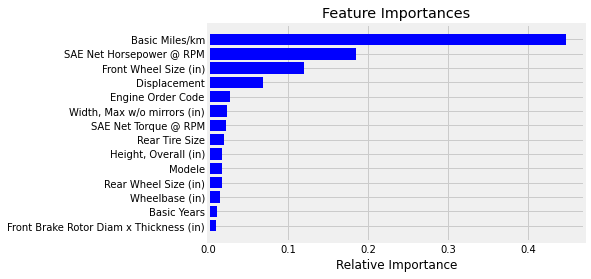

In [20]:
 # print feature importances
importances = model.feature_importances_
indices = np.argsort(importances)
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [liste_variables[i] for i in indices])
plt.xlabel('Relative Importance')